In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

### Khởi tạo dữ liệu

In [4]:
# Tạo các cột theo các phân phối khác nhau
df = pd.DataFrame({"beta": np.random.beta(5, 1, 1000) * 60,
                   "exponential": np.random.exponential(10, 1000),
                   "normal_p": np.random.normal(10, 2, 1000),
                   "normal_l": np.random.normal(10, 10, 1000),
})

df

,beta,exponential,normal_p,normal_l
0,58.907559,3.608836,9.356764,3.039278
1,46.262203,6.859420,12.084073,25.423715
2,39.031495,5.316176,8.978738,23.855267
3,42.867480,17.646130,8.126756,20.079043
4,52.269625,26.646303,8.926636,9.111840
...,...,...,...,...
995,59.488499,12.956128,6.287607,0.448580
996,56.029687,16.542257,10.729349,6.465549
997,55.184604,10.934521,10.616050,1.485354
998,58.732433,35.083426,9.056607,7.435401


In [5]:
# Thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

df["bimodal"] = bimodal

df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.907559,3.608836,9.356764,3.039278,22.044832
1,46.262203,6.859420,12.084073,25.423715,20.082474
2,39.031495,5.316176,8.978738,23.855267,21.264105
3,42.867480,17.646130,8.126756,20.079043,19.304631
4,52.269625,26.646303,8.926636,9.111840,19.186178


### Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

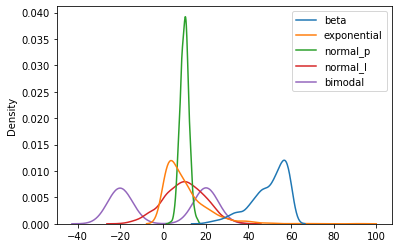

In [6]:
sns.kdeplot(data = df)

In [7]:
# Thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.742374,10.450494,10.037134,9.978639,0.043335
std,8.643416,10.268677,2.027074,9.722102,20.291614
min,19.863729,0.008833,3.040323,-19.019841,-27.437751
25%,44.845175,3.236926,8.674320,3.281367,-20.076382
50%,52.151243,7.621605,10.096279,10.161416,0.730531
75%,56.636165,14.159413,11.357330,16.612315,20.202124
max,59.975777,92.202173,16.366818,38.591215,27.811148


### Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

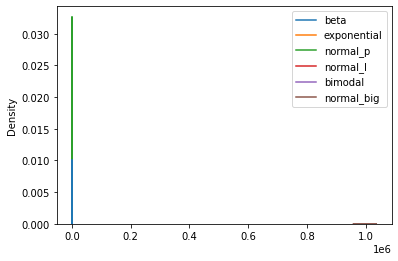

In [9]:
normal_big = np.random.normal(1000000, 10000, (1000, 1))

df["normal_big"] = normal_big

sns.kdeplot(data = df)

<AxesSubplot:>

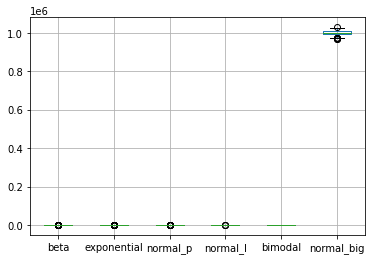

In [10]:
# Trực quan hóa dữ liệu bằng biểu đồ box plot
df.boxplot()

### Chuẩn hóa với Robust Scaling

In [11]:
# Khai báo đối tượng
scaler = RobustScaler()

In [15]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# Lấy danh sách cột
col_names = list(df.columns)

# Truyền về DataFrame, gắn các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns = col_names)

df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.573007,-0.367386,-0.275629,-0.534256,0.529173,0.635251
1,-0.499453,-0.069781,0.740882,1.144877,0.480453,-1.320564
2,-1.112693,-0.211072,-0.416525,1.027223,0.509790,0.760269
3,-0.787361,0.917788,-0.734072,0.743955,0.461142,1.083780
4,0.010040,1.741792,-0.435944,-0.078732,0.458201,-0.323590


<AxesSubplot:ylabel='Density'>

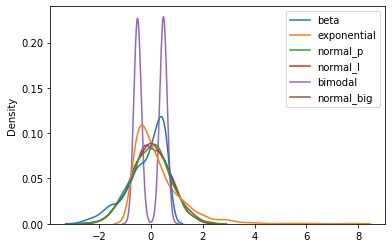

In [16]:
# Biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data = df_s)

In [17]:
# Thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,-2.042974e-01,2.589969e-01,-0.022044,-0.013711,-0.017061,3.936152e-03
std,7.330526e-01,9.401410e-01,0.755522,0.729288,0.503783,7.607441e-01
min,-2.738321e+00,-6.969815e-01,-2.629866,-2.188986,-0.699338,-2.527155e+00
25%,-6.196314e-01,-4.014359e-01,-0.529987,-0.516096,-0.516576,-4.724934e-01
50%,-3.012998e-16,-4.076600e-17,0.000000,0.000000,0.000000,-4.306126e-15
75%,3.803686e-01,5.985641e-01,0.470013,0.483904,0.483424,5.275066e-01
max,6.636028e-01,7.743710e+00,2.337129,2.132617,0.672334,2.079016e+00


<AxesSubplot:>

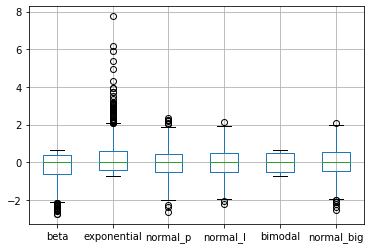

In [18]:
df_s.boxplot()

In [19]:
# Lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-2.738320800508122,
 -0.6969815419720208,
 -2.6298655965014883,
 -2.188985986539955,
 -0.6993377981765199,
 -2.527155061272505]

In [20]:
# Lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.663602787503605,
 7.743710188732886,
 2.33712861091877,
 2.1326165500399665,
 0.6723342114584236,
 2.079016277227929]

In [23]:
# Giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.21512434e+01, 7.62160455e+00, 1.00962788e+01, 1.01614157e+01,
       7.30530610e-01, 1.00019181e+06])